## Testing of trained models-Smp-UNet for binary masks and coin for prediction on new images

### Author: Harpreet Kaur Bargota
### Date: Dec 29, 2025 

/home/AGR.GC.CA/bargotah/.conda/envs/fababean_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 Trained Model loaded
Image tensor shape: torch.Size([1, 3, 224, 224])


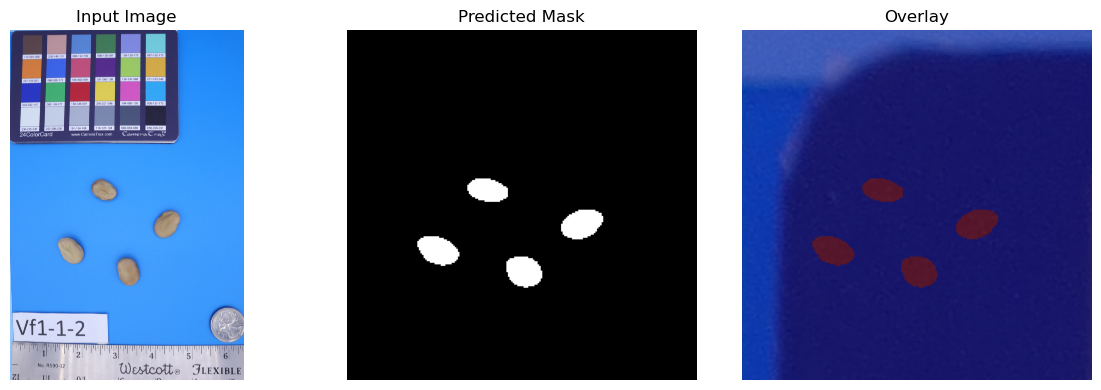

In [1]:
###Image and mask transform change
import torch
import segmentation_models_pytorch as smp
from torchvision import transforms
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Config
# ---------------------------
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

MODEL_PATH = "/home/AGR.GC.CA/bargotah/pipeline/smp_unet_mitb0_faba.pth"
TEST_IMAGE_PATH = "/home/AGR.GC.CA/bargotah/pipeline/faba_images50/Faba-Seed-CC_Vf1-1-2.JPG"
IMG_SIZE = 224
THRESHOLD = 0.5

# ---------------------------
# Transform (same as training)
# ---------------------------
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

# ---------------------------
# Load model
# ---------------------------
model = smp.Unet(
    encoder_name="mit_b0",
    encoder_weights=None,     # IMPORTANT: None for inference
    in_channels=3,
    classes=1,
    activation="sigmoid"
).to(DEVICE)

model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model.eval()

print(" Trained Model loaded")

# ---------------------------
# Load & preprocess image
# ---------------------------
image_pil = Image.open(TEST_IMAGE_PATH).convert("RGB")
image_pil = ImageOps.exif_transpose(image_pil)

image_tensor = transform(image_pil).unsqueeze(0).to(DEVICE)

print("Image tensor shape:", image_tensor.shape)

# ---------------------------
# Inference
# ---------------------------
with torch.no_grad():
    pred = model(image_tensor)

pred_mask = pred[0, 0].cpu().numpy()
binary_mask = (pred_mask > THRESHOLD).astype(np.uint8)

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(image_pil)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Predicted Mask")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(image_pil)
plt.imshow(binary_mask, cmap="jet", alpha=0.5)
plt.axis("off")

plt.tight_layout()
plt.show()


Trained Model loaded
Image tensor shape: torch.Size([1, 3, 224, 224])


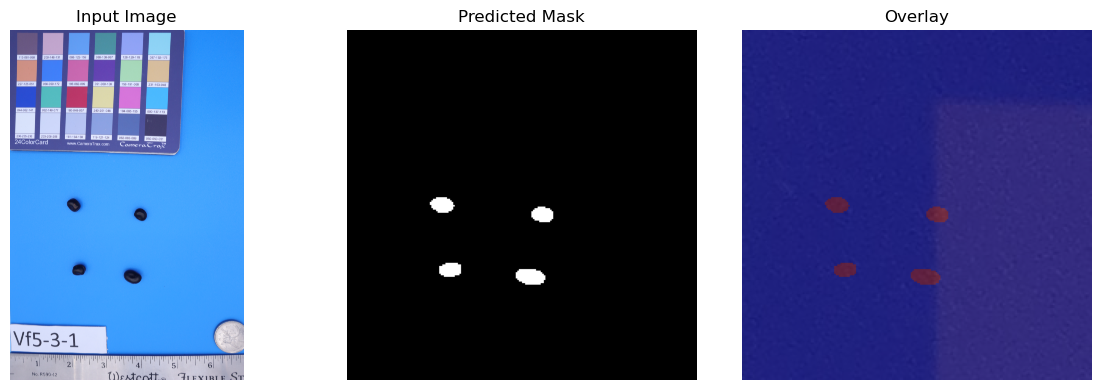

In [2]:
###Image and mask transform change
import torch
import segmentation_models_pytorch as smp
from torchvision import transforms
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Config
# ---------------------------
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

MODEL_PATH = "/home/AGR.GC.CA/bargotah/pipeline/smp_unet_mitb0_faba.pth"
TEST_IMAGE_PATH = "/home/AGR.GC.CA/bargotah/pipeline/Faba_agent/faba_images_new/Faba-Seed-CC_Vf5-3-1.JPG"
IMG_SIZE = 224
THRESHOLD = 0.5

# ---------------------------
# Transform (same as training)
# ---------------------------
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

# ---------------------------
# Load model
# ---------------------------
model = smp.Unet(
    encoder_name="mit_b0",
    encoder_weights=None,     # IMPORTANT: None for inference
    in_channels=3,
    classes=1,
    activation="sigmoid"
).to(DEVICE)

model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model.eval()

print("Trained Model loaded")

# ---------------------------
# Load & preprocess image
# ---------------------------
image_pil = Image.open(TEST_IMAGE_PATH).convert("RGB")
image_pil = ImageOps.exif_transpose(image_pil)

image_tensor = transform(image_pil).unsqueeze(0).to(DEVICE)

print("Image tensor shape:", image_tensor.shape)

# ---------------------------
# Inference
# ---------------------------
with torch.no_grad():
    pred = model(image_tensor)

pred_mask = pred[0, 0].cpu().numpy()
binary_mask = (pred_mask > THRESHOLD).astype(np.uint8)

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(image_pil)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Predicted Mask")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(image_pil)
plt.imshow(binary_mask, cmap="jet", alpha=0.5)
plt.axis("off")

plt.tight_layout()
plt.show()


### Testing for predictiong the coin mask

Trained Model loaded
Image tensor shape: torch.Size([1, 3, 224, 224])


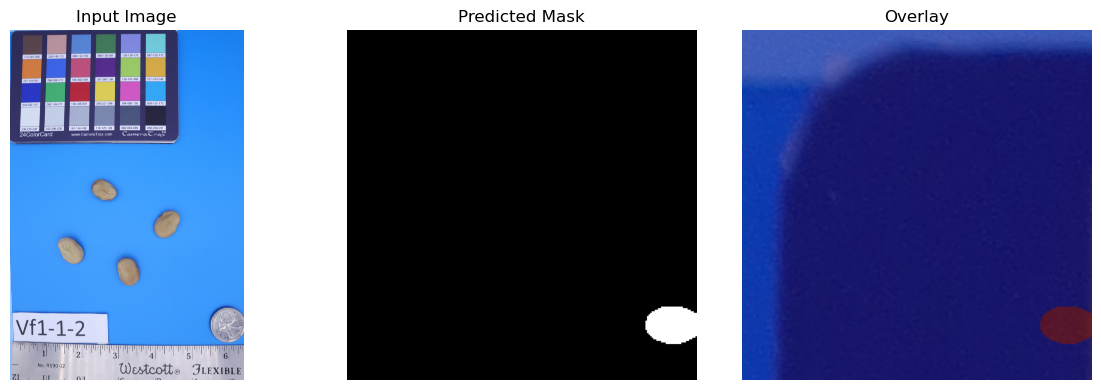

In [3]:
###Image and mask transform change
import torch
import segmentation_models_pytorch as smp
from torchvision import transforms
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Config
# ---------------------------
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

MODEL_PATH = "/home/AGR.GC.CA/bargotah/pipeline/Coin_training/coin_unet_mitb0_coin.pth"
TEST_IMAGE_PATH = "/home/AGR.GC.CA/bargotah/pipeline/faba_images50/Faba-Seed-CC_Vf1-1-2.JPG"
IMG_SIZE = 224
THRESHOLD = 0.5

# ---------------------------
# Transform (same as training)
# ---------------------------
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

# ---------------------------
# Load model
# ---------------------------
model = smp.Unet(
    encoder_name="mit_b0",
    encoder_weights=None,     # IMPORTANT: None for inference
    in_channels=3,
    classes=1,
    activation="sigmoid"
).to(DEVICE)

model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model.eval()

print("Trained Model loaded")

# ---------------------------
# Load & preprocess image
# ---------------------------
image_pil = Image.open(TEST_IMAGE_PATH).convert("RGB")
image_pil = ImageOps.exif_transpose(image_pil)

image_tensor = transform(image_pil).unsqueeze(0).to(DEVICE)

print("Image tensor shape:", image_tensor.shape)

# ---------------------------
# Inference
# ---------------------------
with torch.no_grad():
    pred = model(image_tensor)

pred_mask = pred[0, 0].cpu().numpy()
binary_mask = (pred_mask > THRESHOLD).astype(np.uint8)

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(image_pil)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Predicted Mask")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(image_pil)
plt.imshow(binary_mask, cmap="jet", alpha=0.5)
plt.axis("off")

plt.tight_layout()
plt.show()


Trained Model loaded
Image tensor shape: torch.Size([1, 3, 224, 224])


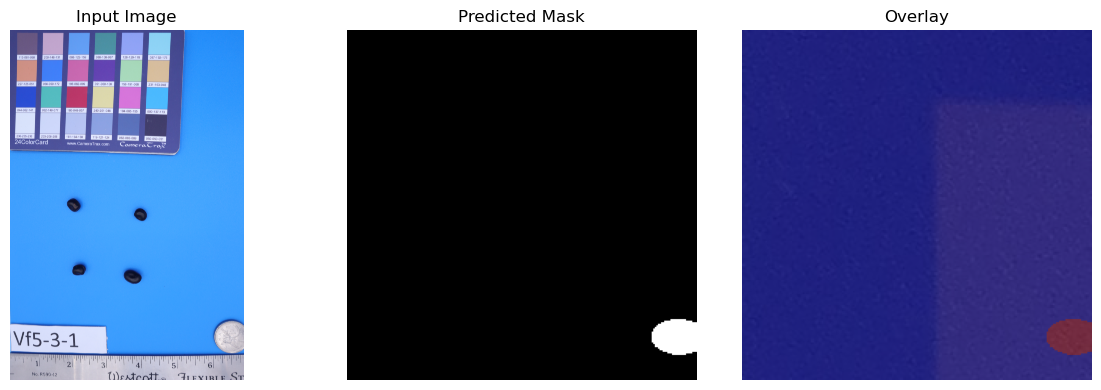

In [4]:
###Image and mask transform change
import torch
import segmentation_models_pytorch as smp
from torchvision import transforms
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Config
# ---------------------------
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

MODEL_PATH = "/home/AGR.GC.CA/bargotah/pipeline/Coin_training/coin_unet_mitb0_coin.pth"
TEST_IMAGE_PATH = "/home/AGR.GC.CA/bargotah/pipeline/Faba_agent/faba_images_new/Faba-Seed-CC_Vf5-3-1.JPG"
IMG_SIZE = 224
THRESHOLD = 0.5

# ---------------------------
# Transform (same as training)
# ---------------------------
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

# ---------------------------
# Load model
# ---------------------------
model = smp.Unet(
    encoder_name="mit_b0",
    encoder_weights=None,     # IMPORTANT: None for inference
    in_channels=3,
    classes=1,
    activation="sigmoid"
).to(DEVICE)

model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model.eval()

print("Trained Model loaded")

# ---------------------------
# Load & preprocess image
# ---------------------------
image_pil = Image.open(TEST_IMAGE_PATH).convert("RGB")
image_pil = ImageOps.exif_transpose(image_pil)

image_tensor = transform(image_pil).unsqueeze(0).to(DEVICE)

print("Image tensor shape:", image_tensor.shape)

# ---------------------------
# Inference
# ---------------------------
with torch.no_grad():
    pred = model(image_tensor)

pred_mask = pred[0, 0].cpu().numpy()
binary_mask = (pred_mask > THRESHOLD).astype(np.uint8)

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(image_pil)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Predicted Mask")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(image_pil)
plt.imshow(binary_mask, cmap="jet", alpha=0.5)
plt.axis("off")

plt.tight_layout()
plt.show()
